In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv(r"C:\Users\DELL\Downloads\world-data-2023.csv")

print(df.duplicated())

#printing rows with nan values
nan_rows=df[df.isna().any(axis=1).copy()]
print(nan_rows)

#printing count of nan in each row
nan_rows['nan_count']=nan_rows.isna().sum(axis=1)
print(nan_rows)


#renaming the column density
df.rename(columns={'Density\n(P/Km2)':'Density(P/Km2)'},inplace=True)

#columns that were cleaned and converted
commas_and_dollar_cols=['Density(P/Km2)','Land Area(Km2)','Armed Forces size','Co2-Emissions','GDP','Population','Urban_population']

#columns with percentage
colspercentage=['Agricultural Land( %)','Forested Area (%)','Total tax rate','Unemployment rate','Tax revenue (%)']

for col in commas_and_dollar_cols:
    df[col]=df[col].astype(str).str.replace(',','',regex=False)  #with the use of regex=false the special characters will
                                                                 #also be treated as lateral string and replace it  as they have special meanings in regular expression here they will be treated as ordinar characters 
    if col in ['Gasoline Price','GDP']:
        df[col]=df[col].str.replace('$','',regex=False)  #with the use of coerce if there are any values that cant be converted into num values then still they will be returned as nan
        df[col]=pd.to_numeric(df[col],errors='coerce')

#cleaning column with percentage sign
for col in colspercentage:
        if col in df.columns:
            df[col]=df[col].astype(str).str.replace('%','',regex=False)
            df[col]=pd.to_numeric(df[col],errors='coerce')
                

# Only drop rows with missing birth/mortality values
print("no of rows before dropping na",df.shape)
infant_cols = ['Infant mortality', 'Birth Rate', 'Life expectancy']
df_infant = df.dropna(subset=infant_cols).copy()
print("no of rows after dropping na",df.shape)

#Visualization 
#countrywise birth rate and infant mortility rate

#sorting the values
df_sorted=df.sort_values(by='Infant mortality',ascending=False)

#selecting top 10 countries
top_10_countries=df_sorted.head(10)

fig, ax = plt.subplots(figsize=(14, 6))
bar_width=0.25
ind=np.arange(len(top_10_countries))

#plotting infant mortality
rects1 =ax.bar(ind - bar_width, top_10_countries['Infant mortality'], bar_width,
                label='Infant Mortality Rate', color='skyblue')
#ind-bar width/2 shifts the bar towrds left and makes space for another bar to be placed
#top 10 countries [infant mortality rate ] returns the height value for each bar

#plotting birth rate
rects2 = ax.bar(ind, top_10_countries['Birth Rate'], bar_width,
                label='Birth Rate', color='lightcoral')

#plotting life expectancy rate
rects3 = ax.bar(ind + bar_width, top_10_countries['Life expectancy'], bar_width,
                label='Life Expectancy', color='Gold')

for i, val in enumerate(top_10_countries['Infant mortality']):
    ax.text(ind[i] - bar_width/2, val + 0.5, f'{val:.1f}', ha='center', fontsize=8, color='blue')

for i, val in enumerate(top_10_countries['Birth Rate']):
    ax.text(ind[i] + bar_width/2, val + 0.5, f'{val:.1f}', ha='center', fontsize=8, color='darkred')    

for i, val in enumerate(top_10_countries['Life expectancy']):
    ax.text(ind[i] + bar_width, val + 0.5, f'{val:.1f}', ha='center', fontsize=8, color='darkgreen')
            
ax.set_xlabel('country',fontsize=12)
ax.set_ylabel('Rate',fontsize=12)
ax.set_title('Top 10 countries by Infant mortality rate and Birth rate',fontsize=12)
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()













           Country  Land Area(Km2)  Agricultural Area(Km2)  \
143         Russia      17098240.0             2274065.920   
32          Canada       9984670.0              688942.230   
186  United States       9833517.0             4366081.548   
36           China       9596960.0             5393491.520   
23          Brazil       8515770.0             2886846.030   
8        Australia       7741220.0             3731268.040   
77           India       3287263.0             1985506.852   
6        Argentina       2780400.0             1509757.200   
87      Kazakhstan       2724900.0             2190819.600   
2          Algeria       2381741.0              414422.934   

     Forested Area(Km2)  Other Land Area(Km2)  
143         8514923.520           6309250.560  
32          3814143.940           5481583.830  
186         3333562.263           2133873.189  
36          2149719.040           2053749.440  
23          5015788.530            613135.440  
8           1261818.860      

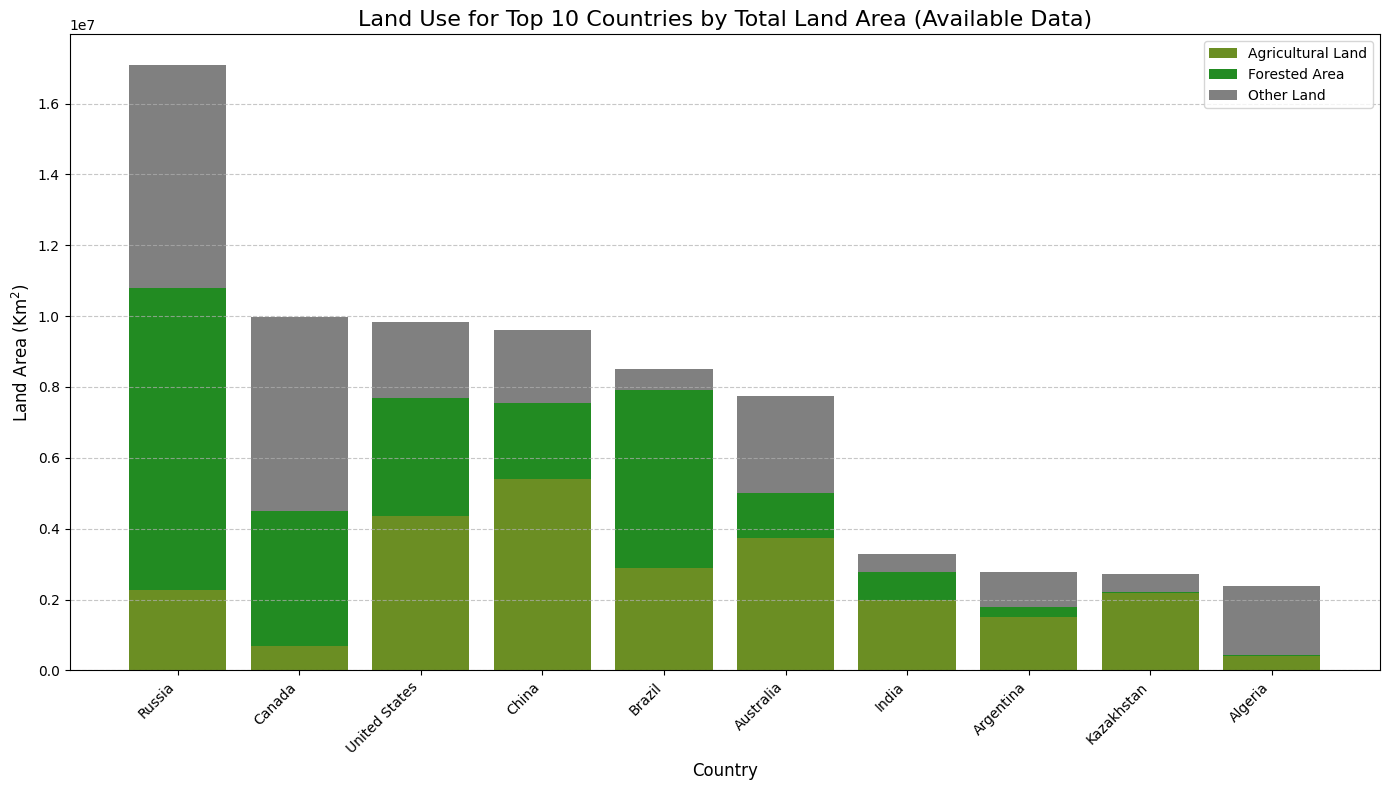

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\world-data-2023.csv")

# Clean relevant columns
df['Land Area(Km2)'] = pd.to_numeric(df['Land Area(Km2)'].astype(str).str.replace(',', ''), errors='coerce')
df['Agricultural Land( %)'] = pd.to_numeric(df['Agricultural Land( %)'].astype(str).str.replace('%', ''), errors='coerce')
df['Forested Area (%)'] = pd.to_numeric(df['Forested Area (%)'].astype(str).str.replace('%', ''), errors='coerce')

# Step 1: Keep only rows that have all required values
df_land = df.dropna(subset=['Land Area(Km2)', 'Agricultural Land( %)', 'Forested Area (%)']).copy()

# Step 2: Pick top 10 countries by land area from cleaned data
top_10_land_countries = df_land.nlargest(10, 'Land Area(Km2)').copy()

# Step 3: Calculate areas
top_10_land_countries['Agricultural Area(Km2)'] = ( top_10_land_countries['Land Area(Km2)'] * top_10_land_countries['Agricultural Land( %)']) / 100
top_10_land_countries['Forested Area(Km2)'] = ( top_10_land_countries['Land Area(Km2)'] * top_10_land_countries['Forested Area (%)']) / 100
top_10_land_countries['Other Land Area(Km2)'] = ( top_10_land_countries['Land Area(Km2)'] -top_10_land_countries['Agricultural Area(Km2)'] -top_10_land_countries['Forested Area(Km2)'])


print(top_10_land_countries[['Country', 'Land Area(Km2)', 'Agricultural Area(Km2)', 'Forested Area(Km2)', 'Other Land Area(Km2)']])

# Step 4: Plot
fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(top_10_land_countries['Country'], top_10_land_countries['Agricultural Area(Km2)'],
       label='Agricultural Land', color='olivedrab')

ax.bar(top_10_land_countries['Country'], top_10_land_countries['Forested Area(Km2)'],
       bottom=top_10_land_countries['Agricultural Area(Km2)'],
       label='Forested Area', color='forestgreen')

ax.bar(top_10_land_countries['Country'], top_10_land_countries['Other Land Area(Km2)'],
       bottom=top_10_land_countries['Agricultural Area(Km2)'] + top_10_land_countries['Forested Area(Km2)'],
       label='Other Land', color='gray')

ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Land Area (Km$^2$)', fontsize=12)
ax.set_title('Land Use for Top 10 Countries by Total Land Area (Available Data)', fontsize=16)
plt.xticks(rotation=45, ha='right')
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


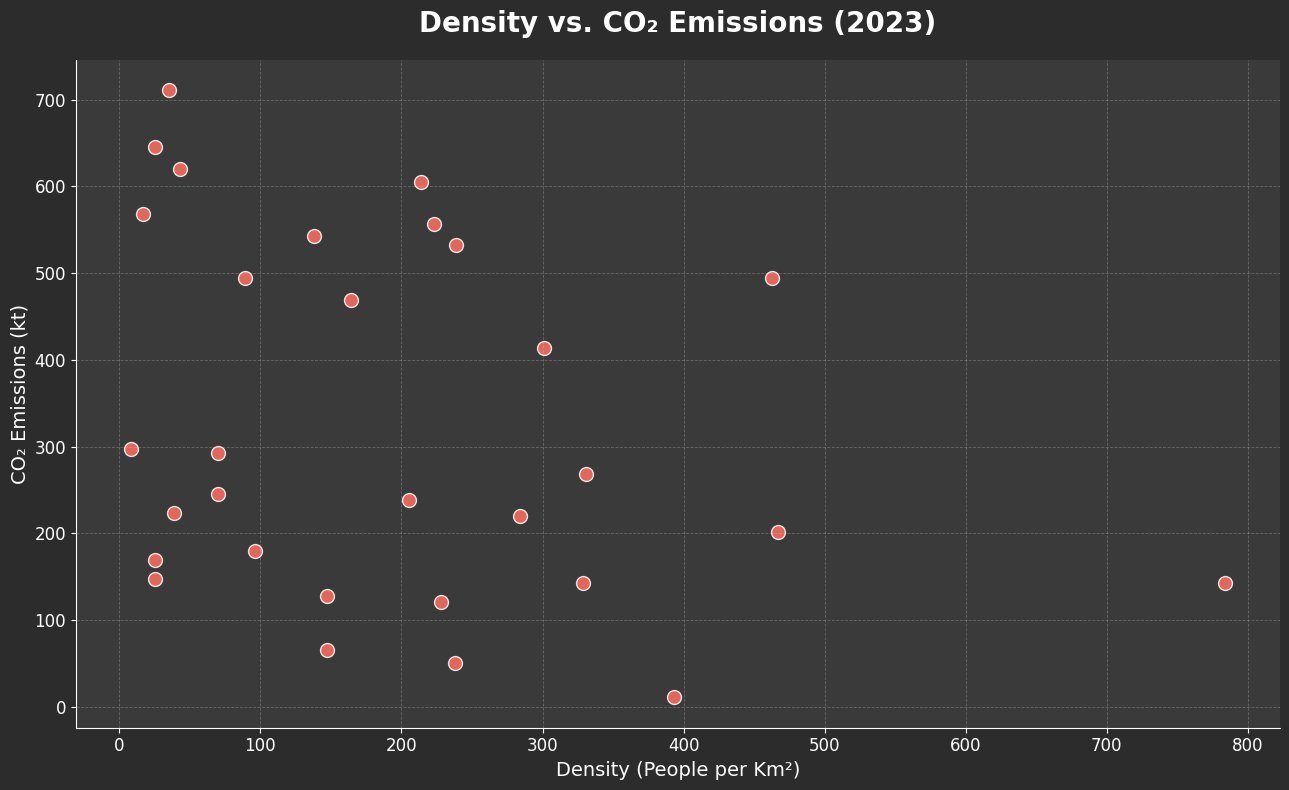

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
df = pd.read_csv(r"C:\Users\DELL\Downloads\world-data-2023.csv")
df.rename(columns={'Density\n(P/Km2)': 'Density(P/Km2)'}, inplace=True)

df['Density(P/Km2)'] = pd.to_numeric(df['Density(P/Km2)'], errors='coerce')
df['Co2-Emissions'] = pd.to_numeric(df['Co2-Emissions'], errors='coerce')
df_density_co2 = df.dropna(subset=['Density(P/Km2)', 'Co2-Emissions'])

# Plotting
fig, ax = plt.subplots(figsize=(13, 8))
fig.patch.set_facecolor('#2c2c2c')      # Light black background
ax.set_facecolor('#3a3a3a')             # Slightly lighter gray for plot area

# Scatter points
ax.scatter(
    df_density_co2['Density(P/Km2)'],
    df_density_co2['Co2-Emissions'],
    c='#ff6f61',   # Soft red for visibility
    edgecolors='white',
    alpha=0.85,
    s=100
)

# Title and labels
ax.set_title('Density vs. CO₂ Emissions (2023)', fontsize=20, fontweight='bold', color='white', pad=20)
ax.set_xlabel('Density (People per Km²)', fontsize=14, color='white')
ax.set_ylabel('CO₂ Emissions (kt)', fontsize=14, color='white')

# Format y-axis without scientific notation
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Ticks
ax.tick_params(axis='both', colors='white', labelsize=12)

# Grid
ax.grid(True, linestyle='--', linewidth=0.6, color='lightgray', alpha=0.3)

# Hide top/right spines, color others
# Hide top/right spines, color others
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color('white')

plt.tight_layout()
plt.show()




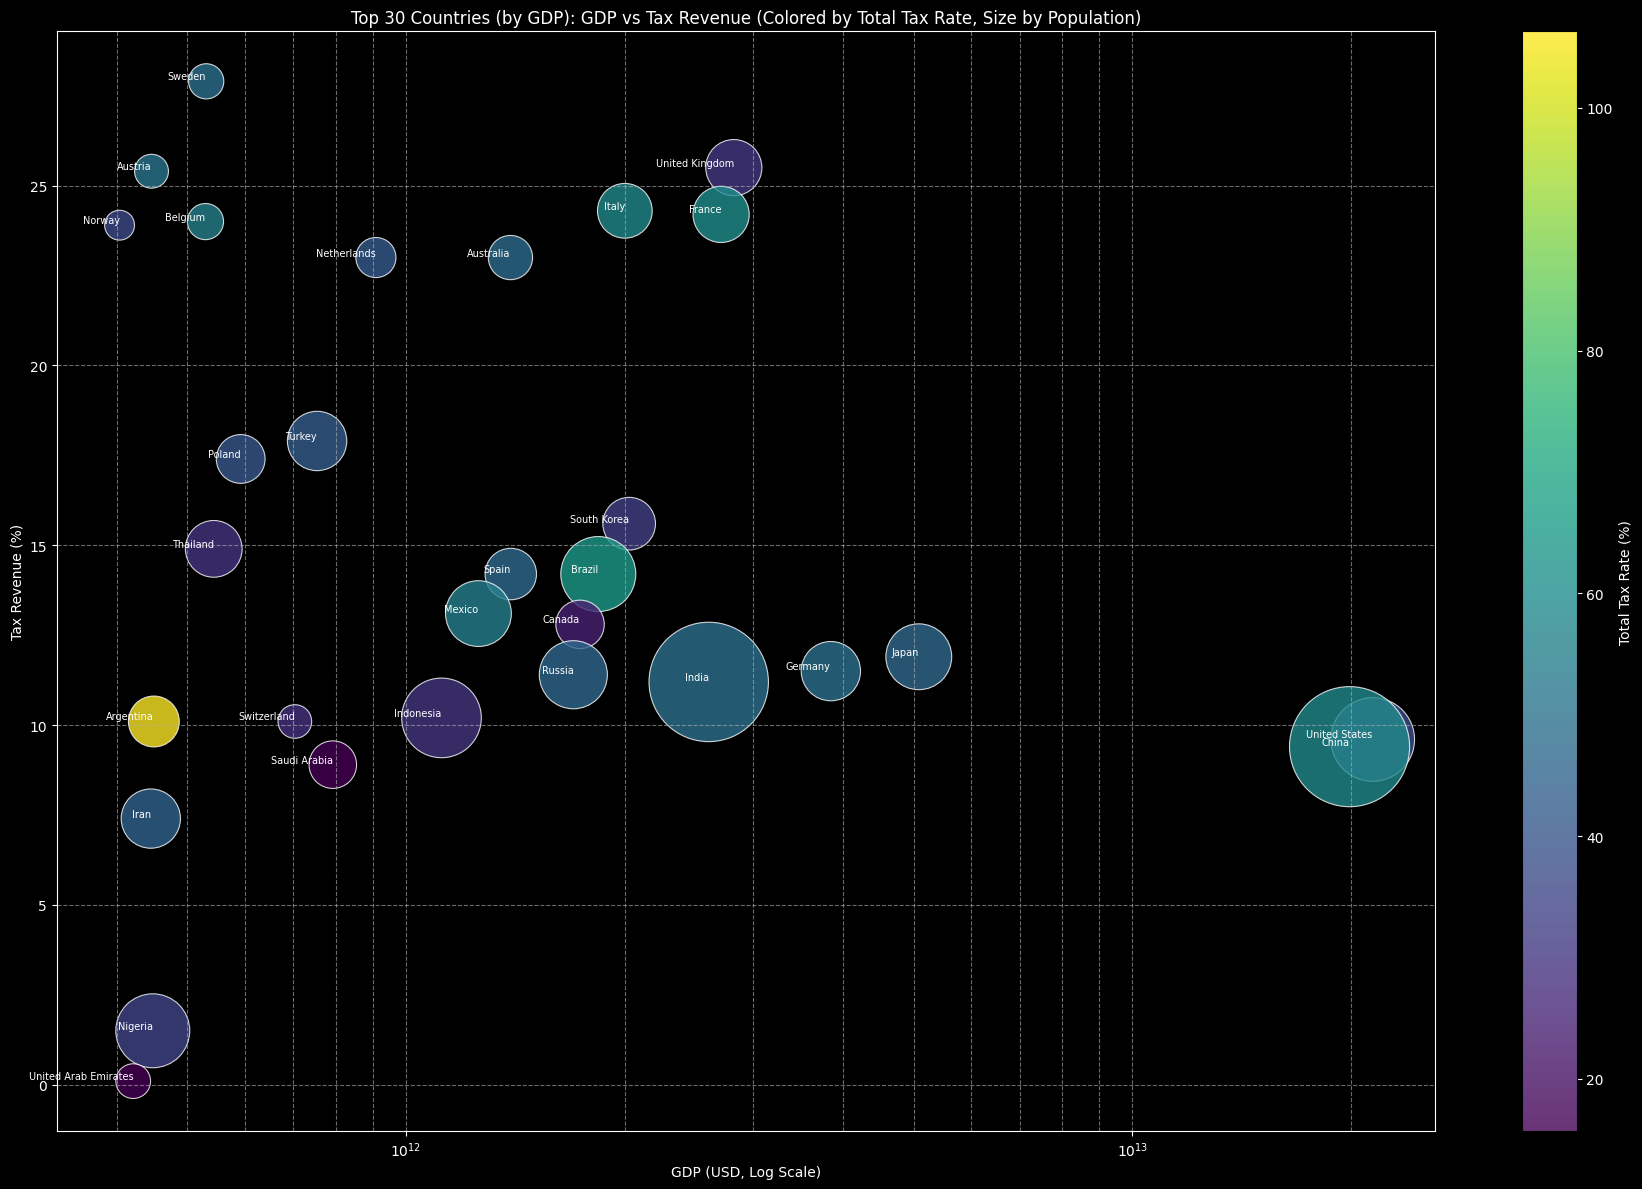

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data
df = pd.read_csv('world-data-2023.csv')

# Fix column names
df.rename(columns={'Density\n(P/Km2)': 'Density(P/Km2)'}, inplace=True)

# Clean and convert data
# GDP: Remove '$' and commas, then convert to numeric
df['GDP'] = df['GDP'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['GDP'] = pd.to_numeric(df['GDP'], errors='coerce')

# Tax revenue (%): Remove '%' and convert to numeric
df['Tax revenue (%)'] = df['Tax revenue (%)'].astype(str).str.replace('%', '', regex=False)
df['Tax revenue (%)'] = pd.to_numeric(df['Tax revenue (%)'], errors='coerce')

# Total tax rate: Remove '%' and convert to numeric
df['Total tax rate'] = df['Total tax rate'].astype(str).str.replace('%', '', regex=False)
df['Total tax rate'] = pd.to_numeric(df['Total tax rate'], errors='coerce')

# Population: Remove commas and convert to numeric
df['Population'] = df['Population'].astype(str).str.replace(',', '', regex=False)
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')

# Drop rows with missing values in the essential plotting columns: GDP, Tax revenue (%), and Population
df_cleaned = df.dropna(subset=['Country', 'GDP', 'Tax revenue (%)', 'Population']).copy()

# Fill NaN values in 'Total tax rate' with the mean for plotting, for the remaining rows.
if not df_cleaned.empty:
    mean_total_tax_rate = df_cleaned['Total tax rate'].mean()
    df_cleaned['Total tax rate_filled'] = df_cleaned['Total tax rate'].fillna(mean_total_tax_rate)
else:
    print("WARNING: Cleaned DataFrame is empty after dropping NaNs. Cannot proceed with plotting.")
    exit()

# Sort by GDP to get the top countries and select the top 30
df_top_countries = df_cleaned.sort_values(by='GDP', ascending=False).head(30).copy()

# Plotting
plt.figure(figsize=(18, 12))

# Set figure and axes background to black
fig = plt.gcf()
fig.patch.set_facecolor('black')
ax = plt.gca()
ax.set_facecolor('black')

# Scatter plot: GDP vs Tax revenue (%) for Top 30 Countries
# Color by Total tax rate (filled), Size by Population
scatter = ax.scatter(
    df_top_countries['GDP'],
    df_top_countries['Tax revenue (%)'],
    c=df_top_countries['Total tax rate_filled'], # Color by Total tax rate (with NaNs filled)
    cmap='viridis',               # Colormap
    s=np.sqrt(df_top_countries['Population']) / 5, # Scale population for bubble size (adjust as needed, using sqrt)
    alpha=0.8,
    edgecolors='w',
    linewidth=0.8
)

# Add country names as labels for each point
# Adjust text placement and font size to minimize overlap for more labels
for i, row in df_top_countries.iterrows():
    ax.text(
        row['GDP'],
        row['Tax revenue (%)'],
        row['Country'],
        fontsize=7, # Slightly smaller font for more labels
        ha='right', # Horizontal alignment
        va='bottom', # Vertical alignment
        color='white' # Set text color to white
    )

# Add colorbar for Total Tax Rate
cbar = plt.colorbar(scatter)
cbar.set_label('Total Tax Rate (%)', color='white') # Set colorbar label color to white
cbar.ax.tick_params(colors='white') # Set colorbar tick label colors to white


plt.xscale('log') # Use log scale for GDP due to wide range
plt.xlabel('GDP (USD, Log Scale)', color='white') # Set xlabel color to white
plt.ylabel('Tax Revenue (%)', color='white') # Set ylabel color to white
plt.title('Top 30 Countries (by GDP): GDP vs Tax Revenue (Colored by Total Tax Rate, Size by Population)', color='white') # Set title color to white
plt.grid(True, which="both", ls="--", c='0.7', alpha=0.6)

# Set tick parameters color to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set spine colors to white
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.tight_layout()
plt.savefig('top_30_countries_tax_gdp_plot_black_background.png')
plt.show()